Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


Load dataset

In [2]:

df = pd.read_csv('/content/stroke_data.csv')


Preprocessing

In [3]:
df.isnull().sum()

# If there are missing values in 'bmi' or 'smoking_status', fill them with the median or mode.
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)


Encoding Categorical Variables
Convert categorical variables into numerical values using Label Encoding or One-Hot Encoding.

In [4]:
label_encoder = LabelEncoder()

# Encoding categorical columns
df['sex'] = label_encoder.fit_transform(df['sex'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])


Split dataset

In [5]:
X = df.drop('stroke', axis=1)  # Features
y = df['stroke']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Apply randomforest classifier

In [6]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict the test set
y_pred = rf_classifier.predict(X_test)


MODEL EVALUATION

1) Confusion matrix

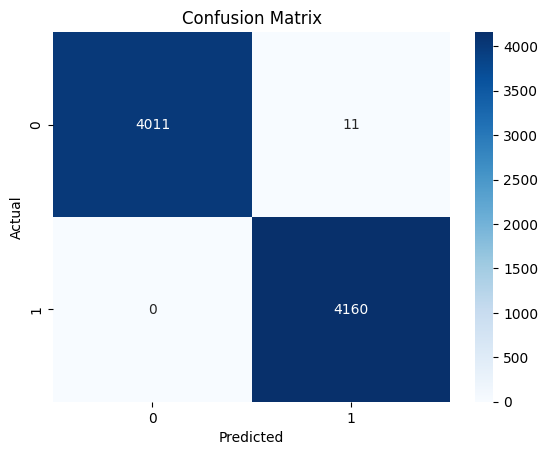

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


2)Accuracy

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 99.87%


3) Classification report

In [9]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4022
           1       1.00      1.00      1.00      4160

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182



3) Feature importance in making proper decision.

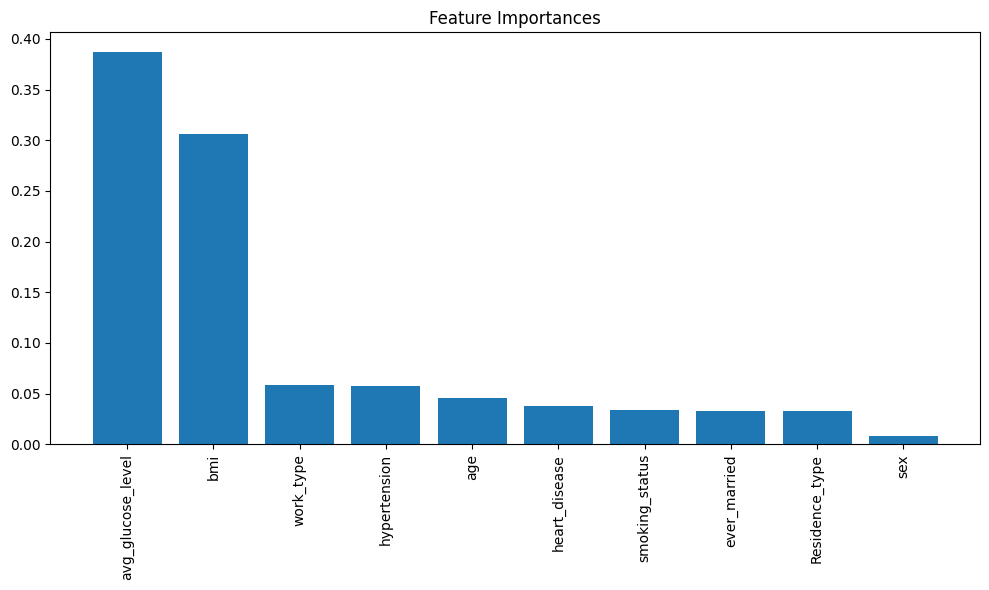

In [10]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


8) More graphical insightes for better understanding

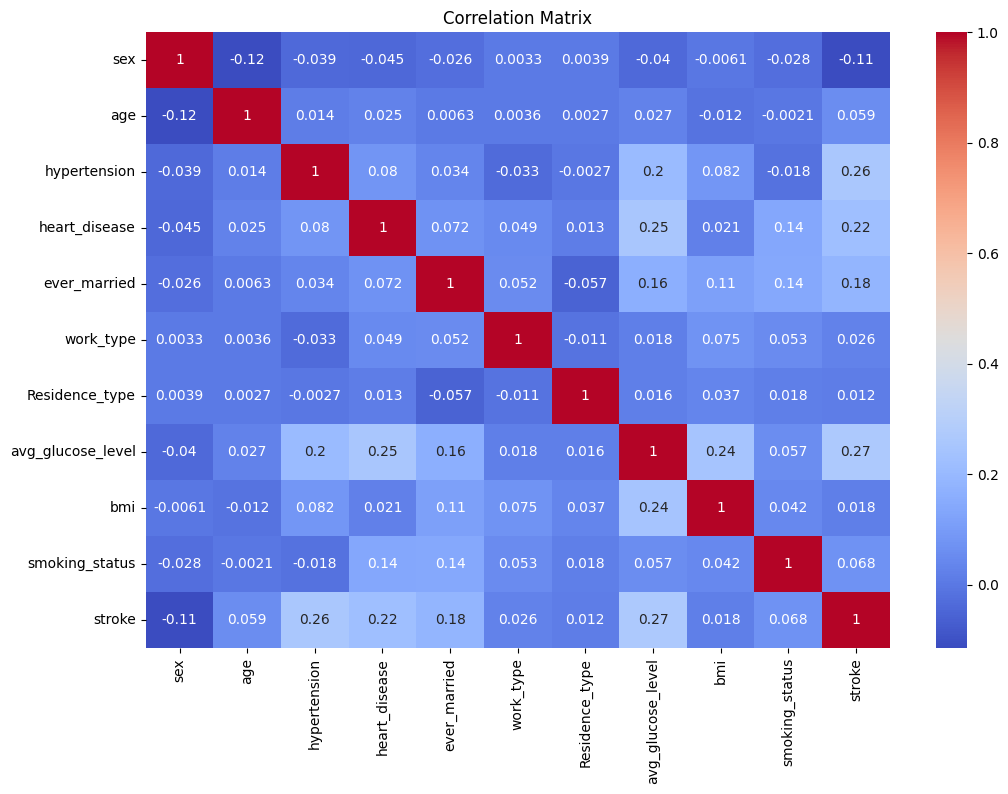

In [11]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


SAMPLE DATA FOR TESTING PREDICTION OF STROKE
note : 0 FOR NO STROKE and 1 FOR STROKE

In [12]:
# Example input (replace with real data)
new_data = np.array([[1, 67, 0, 1, 1, 2, 1, 228.69, 36.6, 1]])

# Predict stroke
stroke_prediction = rf_classifier.predict(new_data)
print(f'Stroke Prediction: {stroke_prediction[0]}')  # 0 = No stroke, 1 = Stroke


Stroke Prediction: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
